# SLU13: Bias-Variance trade-off & Model Selection -- Examples

---

<a id='top'></a>

### 1. Model evaluation
* a. [Train-test split](#traintest)
* b. [Train-val-test split](#val)
* c. [Cross validation](#crossval)


### 2. [Learning curves](#learningcurves)


# 1. Model evaluation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import learning_curve

%matplotlib inline

In [2]:
# Create the DataFrame with the data
df = pd.read_csv("data/beer.csv")

# Create a DataFrame with the features (X) and labels (y)
X = df.drop(["IsIPA"], axis=1)
y = df["IsIPA"]

In [3]:
print("Number of entries: ", X.shape[0])

Number of entries:  1000


<a id='traintest'></a> [Return to top](#top)
## Create a training and a test set

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Using 20 % of the data as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
print("Number of training entries: ", X_train.shape[0])
print("Number of test entries: ", X_test.shape[0])

Number of training entries:  800
Number of test entries:  200


<a id='val'></a> [Return to top](#top)
## Create a training, test and validation set

In [7]:
# Using 20 % as test set and 20 % as validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [8]:
print("Number of training entries: ", X_train.shape[0])
print("Number of validation entries: ", X_val.shape[0])
print("Number of test entries: ", X_test.shape[0])

Number of training entries:  600
Number of validation entries:  200
Number of test entries:  200


<a id='crossval'></a> [Return to top](#top)

## Use cross-validation (using a given classifier)

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
# Use cv to specify the number of folds
scores = cross_val_score(knn, X, y, cv=5)

In [11]:
print(f"Mean of scores: {scores.mean():.3f}")
print(f"Variance of scores: {scores.var():.3f}")

Mean of scores: 0.916
Variance of scores: 0.000


<a id='learningcurves'></a> [Return to top](#top)

# 2. Learning Curves

Here is the function that is taken from the sklearn page on learning curves:

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test Set score")

    plt.legend(loc="best")
    return plt

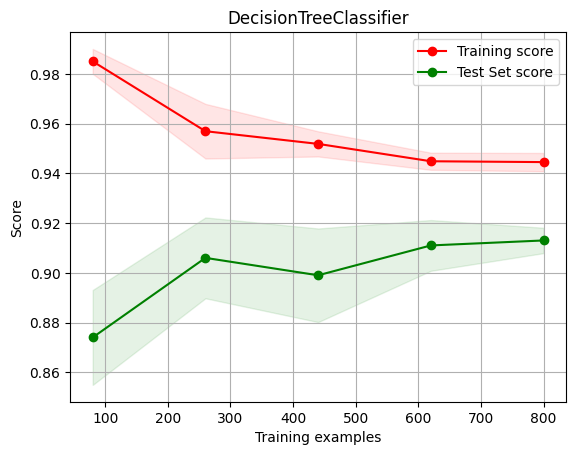

In [13]:
# and this is how we used it

# Handling missing values and excluding non-numeric features
X = df.select_dtypes(exclude='object').fillna(-1).drop('IsIPA', axis=1)
y = df.IsIPA

# Instantiate classifier
clf = DecisionTreeClassifier(random_state=1, max_depth=5)

# Plot the learning curve
plot_learning_curve(X=X, y=y, estimator=clf, title='DecisionTreeClassifier');

And remember the internals of what this function is actually doing by knowing how to use the
output of the scikit [learning_curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) function

In [14]:
# here's where the magic happens! The learning curve function is going
# to take your classifier and your training data and subset the data
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)

# 5 different training set sizes have been selected
# with the smallest being 59 and the largest being 594
# the remaining is used for testing
print('train set sizes', train_sizes)
print('test set sizes', X.shape[0] - train_sizes)

train set sizes [ 80 260 440 620 800]
test set sizes [920 740 560 380 200]


In [15]:
# each row corresponds to a training set size
# each column corresponds to a cross validation fold
# the first row is the highest because it corresponds
# to the smallest training set which means that it's very
# easy for the classifier to overfit and have perfect
# test set predictions while as the test set grows it
# becomes a bit more difficult for this to happen.
train_scores

array([[0.975     , 0.9875    , 0.9875    , 0.9875    , 0.9875    ],
       [0.93846154, 0.97307692, 0.95769231, 0.95769231, 0.95769231],
       [0.95      , 0.96136364, 0.95227273, 0.94772727, 0.94772727],
       [0.94032258, 0.95      , 0.94193548, 0.94677419, 0.94516129],
       [0.945     , 0.95125   , 0.94125   , 0.94375   , 0.94125   ]])

In [16]:
# The test set scores where again, each row corresponds
# to a train / test set size and each column is a differet
# run with the same train / test sizes
test_scores

array([[0.885, 0.855, 0.905, 0.855, 0.87 ],
       [0.875, 0.905, 0.915, 0.915, 0.92 ],
       [0.87 , 0.905, 0.885, 0.915, 0.92 ],
       [0.91 , 0.9  , 0.91 , 0.905, 0.93 ],
       [0.905, 0.915, 0.92 , 0.915, 0.91 ]])

In [17]:
# Let's average the scores across each fold so that we can plot them
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

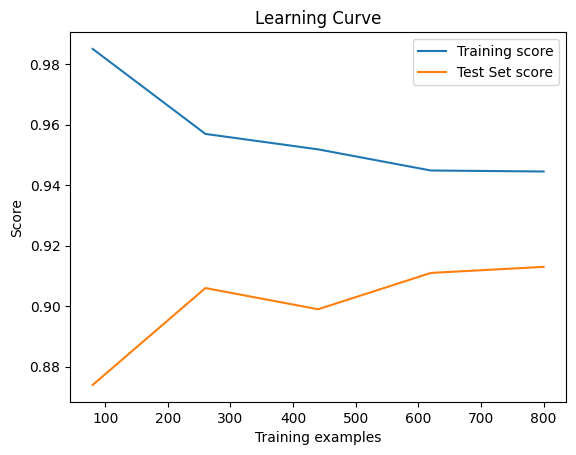

In [18]:
# this one isn't quite as cool as the other because it doesn't show the variance
# but the fundamentals are still here and it's a much simpler one to understand

learning_curve_df = pd.DataFrame({
    'Training score': train_scores_mean,
    'Test Set score': test_scores_mean
}, index=train_sizes)

plt.figure()
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.title('Learning Curve')
plt.plot(learning_curve_df);
plt.legend(learning_curve_df.columns, loc="best");
